In [1]:

from network_models.soundsream_models_and_utils.ss_encoded_dataset import ss_encoded_dataset_full
import torch
from torch.utils.data import DataLoader

dataset_0_2_sec = ss_encoded_dataset_full(csvPath="/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/datasets/clip_encoded/umap_3_dims/all_encodings_with_umap_0_2_sec.pkl")
dataset_1_sec = ss_encoded_dataset_full(csvPath="/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/datasets/clip_encoded/umap_3_dims/all_encodings_with_umap_1_sec.pkl")
dataset_3_5_sec = ss_encoded_dataset_full(csvPath="/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/datasets/clip_encoded/umap_3_dims/all_encodings_with_umap_3_5_sec.pkl")
dataset_5_sec = ss_encoded_dataset_full(csvPath="/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/datasets/clip_encoded/umap_3_dims/all_encodings_with_umap_5_sec.pkl")

2023-03-23 15:37:18.223235: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 15:37:19.093135: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-23 15:37:19.093293: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-23 15:37:19.093299: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
from numpy import ndarray
json_path ="/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/results/3_5_sec_3_dims/"



def genAvgAndAvgPerEmotion(data: pd.DataFrame, labelList: list):
    d = pd.DataFrame()
    d["emotion"] = []
    d["mean"] = []
    d["var"] = []
    for emotion in labelList:
        dIter = pd.DataFrame()
        dfEmo = data.loc[data["clear_emotion"].isin([emotion])]
        npEmo = np.array([point.numpy() for point in dfEmo["pca"].values.tolist()])
        dIter["emotion"] = [emotion]
        dIter["mean"]= [npEmo.mean(axis=0)]
        dIter["var"] = [npEmo.var(axis=0)]
        d = pd.concat([d, dIter], ignore_index=True)
        #d.append(dIter)
    return d


def generateJson(data):
    str = "{"
    for i in range(len(data)):
        str += f"\"x{i+1}\": {data[i]}"
        str += "," if i < len(data)-1 else ""
    str += "}"
    return(str)

def writeJson(emotion, string, apendix=""):
    Path(json_path).mkdir(parents=True, exist_ok=True)
    print(f"writing: {string} \n to {json_path+emotion}.json")
    file = open(json_path+f"{emotion}{apendix}.json", "w")
    file.write(string)
    file.close()

def write_latex(fileName, string):
    print(f"writing: {string} \n to {json_path+fileName}.txt")
    file = open(json_path+f"{fileName}.txt", "w")
    file.write(string)
    file.close()

In [3]:
df = dataset_3_5_sec.encoded_dataset.encodedData
dfTess = df.loc[df["dataset"].isin(["tess"])]
labels = dfTess["clear_emotion"].unique().tolist()
# dfEmo = dfTess.loc[dfTess["clear_emotion"].isin(["happy"])]
# np.array([point.numpy() for point in dfEmo["pca"].values.tolist()]).mean(axis=0)
df = genAvgAndAvgPerEmotion(dfTess, dfTess["clear_emotion"].unique().tolist())


#df.loc[df["emotion"].isin(["happy"])]["mean"].tolist()[0]

In [4]:
dfFull = genAvgAndAvgPerEmotion(dataset_3_5_sec.encoded_dataset.encodedData, dataset_3_5_sec.encoded_dataset.encodedData["clear_emotion"].unique().tolist())

In [26]:
dfFull.floor

TypeError: must be real number, not str

In [24]:
write_latex("3_5_tex.txt", dfFull.to_latex(float_format="%.2f", index=False))

writing: \begin{tabular}{lll}
\toprule
 emotion &                                      mean &                                    var \\
\midrule
   happy &  [0.030001542, -0.035398077, 0.039904945] &    [0.20486468, 0.16146109, 0.2353834] \\
 neutral &   [0.116958424, -0.15280835, 0.008038008] &    [0.2089116, 0.15792863, 0.16269015] \\
     sad &   [0.21286307, -0.008175603, 0.086377054] &    [0.2138159, 0.13120322, 0.14631493] \\
   angry &    [0.08113688, 0.03463475, -0.046745118] & [0.113375686, 0.097585015, 0.21205078] \\
 disgust &  [-0.22042182, -0.027392345, -0.11075816] &  [0.10216983, 0.097342566, 0.14280427] \\
    fear &      [0.07621732, 0.14690956, 0.01854293] &   [0.19513448, 0.10354697, 0.11666733] \\
surprise & [-0.0056670555, -0.048276283, 0.08719717] &   [0.22690502, 0.17950717, 0.21239217] \\
\bottomrule
\end{tabular}
 
 to /home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/results/3_5_sec_3_dims/3_5_tex.txt.txt


/tmp/ipykernel_220976/271723246.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  write_latex("3_5_tex.txt", dfFull.to_latex(float_format="%.2f", index=False))


In [24]:
for label in labels:
    line = df.loc[df["emotion"].isin([label])]["mean"].tolist()[0]
    writeJson(label, generateJson(line), apendix="_tess")

writing: {"x1": 0.8594265580177307,"x2": 0.3078649044036865,"x3": -0.3972800076007843} 
 to /home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/results/3_5_sec_3_dims/disgust.json
writing: {"x1": -0.03818598389625549,"x2": 0.7539190053939819,"x3": -0.6361017227172852} 
 to /home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/results/3_5_sec_3_dims/angry.json
writing: {"x1": 0.4506640136241913,"x2": 0.8147784471511841,"x3": 0.4637155532836914} 
 to /home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/results/3_5_sec_3_dims/happy.json
writing: {"x1": 0.15468187630176544,"x2": -0.08899111300706863,"x3": 0.8420271873474121} 
 to /home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/results/3_5_sec_3_dims/fear.json
writing: {"x1": -0.48591193556785583,"x2": 0.5102663636207581,"x3": 0.3900071382522583} 
 to /home/ckwdani/Programming/Projects/

In [30]:
df = dataset_3_5_sec.encoded_dataset.encodedData


In [40]:
dfOrig = dataset_3_5_sec.encoded_dataset.encodedData
df3D = genAvgAndAvgPerEmotion(dfOrig, dfOrig["clear_emotion"].unique().tolist())


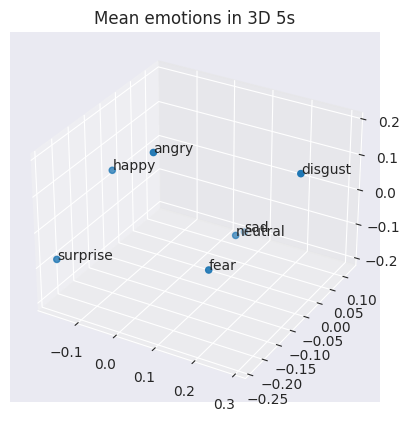

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure() #.gca(projection='3d')
ax3d = plt.axes(projection='3d')

#xyzxyz
#yxxzzy
#zzyyxx

def drawElipsis(xCenter, yCenter, zCenter, xr, yr, zr):
    #draw sphere
    u = np.linspace(0, 2 * np.pi, 10)
    v = np.linspace(0, np.pi, 10)
    x = xCenter + xr * np.outer(np.cos(u), np.sin(v))
    y = yCenter + yr * np.outer(np.sin(u), np.sin(v))
    z = zCenter + zr * np.outer(np.ones_like(u), np.cos(v))
    return (x,y,z)


arrayx = np.asarray(df3D['mean'].tolist())[:,0]
arrayy = np.asarray(df3D['mean'].tolist())[:,1]
arrayz = np.asarray(df3D['mean'].tolist())[:,2]
variances = df3D["var"].tolist()

# z,x,y --- 3.s

labels =df3D["emotion"].tolist()

np.asarray(df3D['mean'].tolist())[:,0]
ax3d.scatter(arrayx, arrayy, arrayz)
for x, y, z, label, varss in zip(arrayx, arrayy, arrayz, labels, variances):
    ax3d.text(x, y, z, label)
    #xe, ye, ze = drawElipsis(x,y,z, varss[0], varss[1], varss[2])
    #ax3d.plot_wireframe(xe, ye, ze)
plt.title("Mean emotions in 3D 5s")
plt.show()

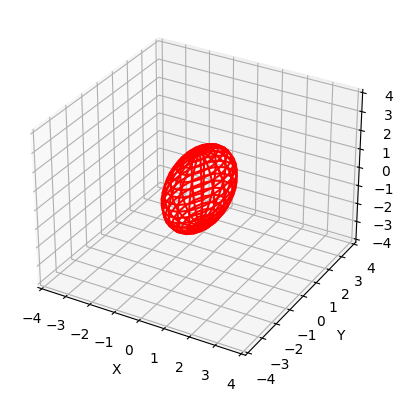

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the radii of the ellipsoid
a = 1  # radius along the x-axis
b = 2  # radius along the y-axis
c = 2  # radius along the z-axis

# Define the center point of the ellipsoid
x0, y0, z0 = 0, 0, 0

# Create a grid of coordinates
u = np.linspace(0, 2 * np.pi, 20)
v = np.linspace(0, np.pi, 20)
x = x0 + a * np.outer(np.cos(u), np.sin(v))
y = y0 + b * np.outer(np.sin(u), np.sin(v))
z = z0 + c * np.outer(np.ones_like(u), np.cos(v))

# Create a 3D scatterplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the ellipsoid as a wireframe
ax.plot_wireframe(x, y, z, color='red')

# Set the plot limits and labels

ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

In [125]:
df3D["var"].tolist()[0][0]

0.0017514498

In [4]:
#asaa = pd.DataFrame(genAvgFull([arra, arra_dr], data_set.encoded_dataset.label_list ,["conv", "dimred"]))


# write_latex("conv_mean_var" ,asaa["conv"].T.to_latex(float_format="{{:0.2f}}"))
# write_latex("dimred_mean_var" ,asaa["dimred"].T.to_latex(float_format="{{:0.2f}}"))
# #asaa["conv"].to_latex()

In [10]:
from utils.utils__evalutation import show_bars
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns



def show_bars_local(predictions, label_list, color="r", title_string ="", dims = 4, normalize = False):

    show_bars(predictions, label_list, color, title_string, dims, normalize = normalize)



In [7]:
dataset_1_sec.getNextNeighbour(vector=[0.5, 0.5, 0.5, 0.5], emotion="sad",included_datasets= ["tess", "mesd"])

encoded          [tensor(1.0876), tensor(-0.4362), tensor(1.174...
emotionCode                                                    [5]
clear_emotion                                                  sad
pca              [tensor(0.4267), tensor(0.1840), tensor(0.5645...
dataset                                                       mesd
Name: 288, dtype: object

In [17]:
dfOrig = dataset_5_sec.encoded_dataset.encodedData

labels = dataset_3_5_sec.encoded_dataset.label_list
dict = {}
for label in labels:
    emo = dfOrig.loc[dfOrig['clear_emotion'].isin([label])]
    dict.update({label: [dp.numpy() for dp in emo["pca"].tolist()]})

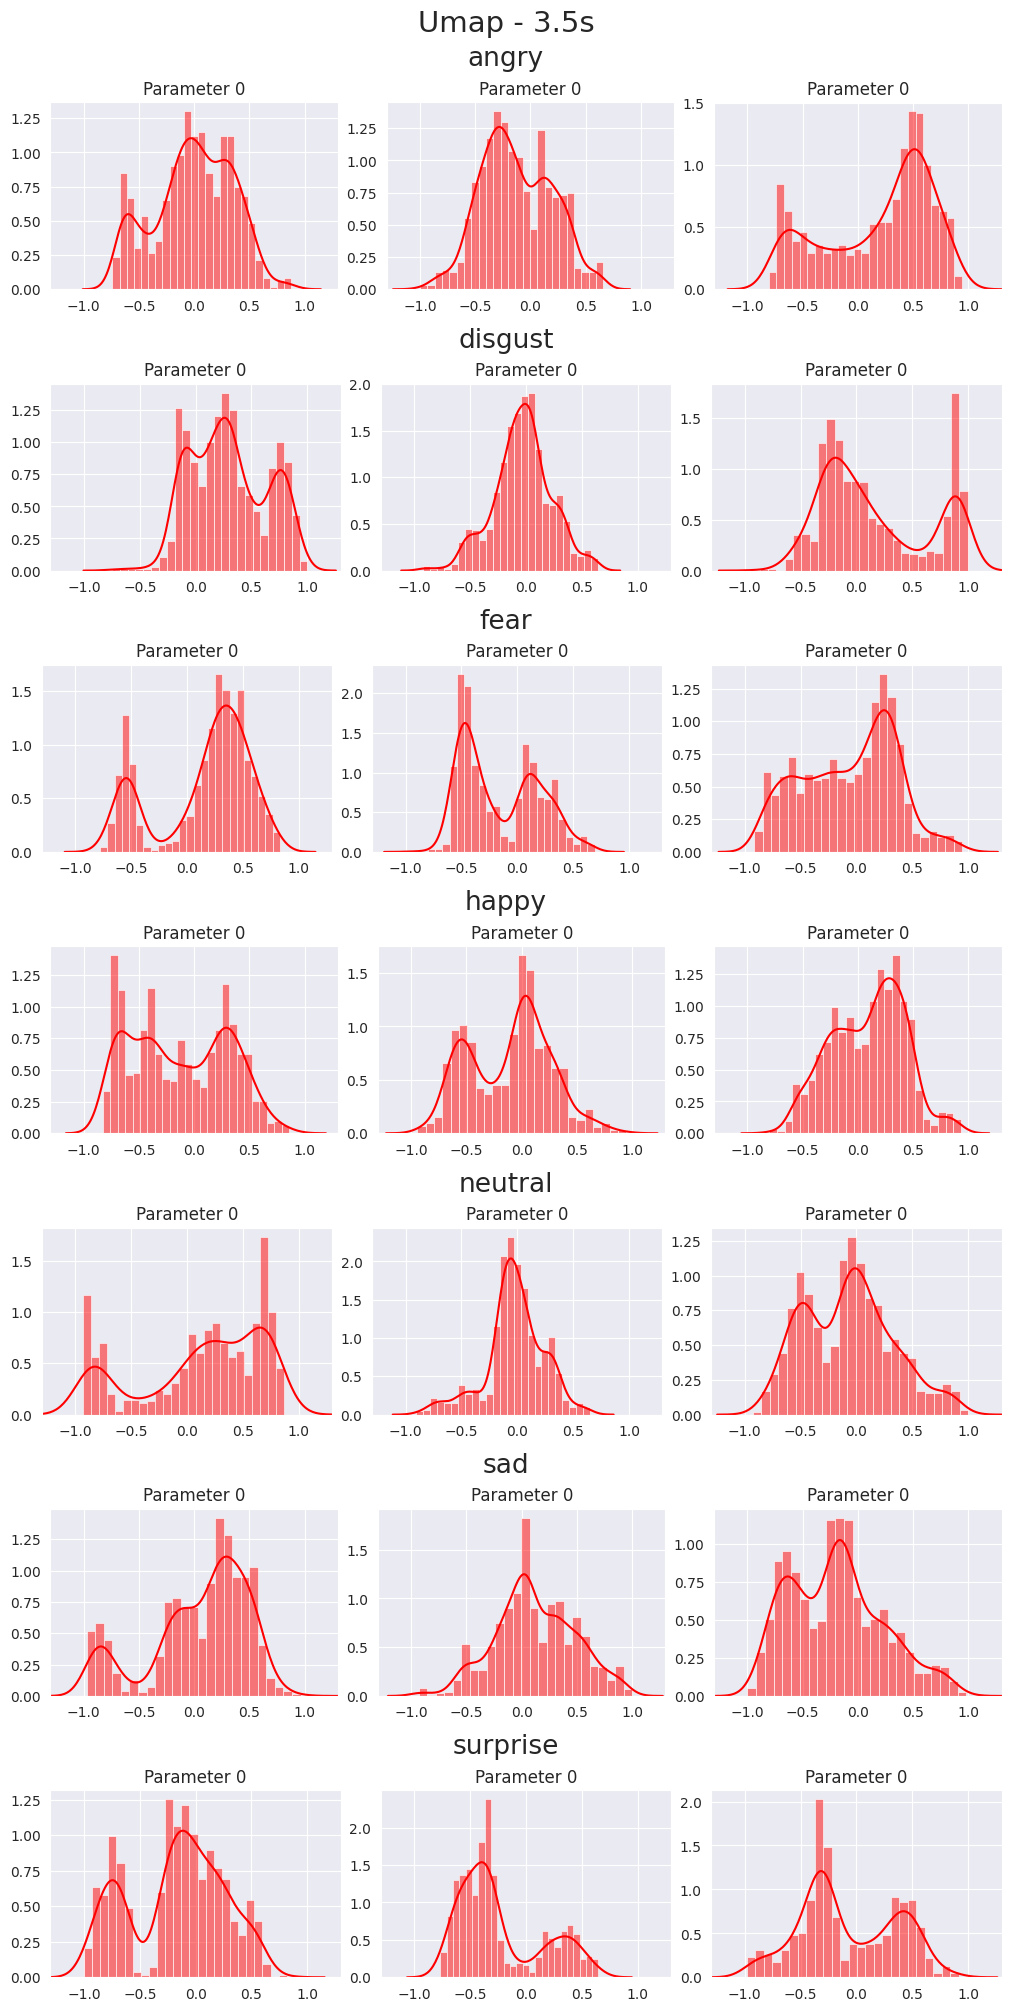

In [18]:

show_bars_local(dict, labels, color="r", title_string="Umap - 3.5s", dims=3, normalize = True)

In [19]:
len(dict["neutral"])

759